In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts 

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
import my_library.gluex_style as gxstyle

#### Make Plots

In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data', filtered=False)
df_pimkpks = tools.get_dataframe('pimkpks', 'gluex1', 'data', filtered=False)


In [4]:
df_pipkmks = df_pipkmks.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.P_P_CUT).Filter(kcuts.BEAM_RANGE).Filter(kcuts.T_RANGE)
df_pimkpks = df_pimkpks.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIMKPKS_CUT).Filter(kcuts.P_P_CUT).Filter(kcuts.BEAM_RANGE).Filter(kcuts.T_RANGE)

df_f1_pipkmks = df_pipkmks.Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS)
df_f1_pimkpks = df_pimkpks.Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS)

In [5]:
hist_ks_before = df_f1_pipkmks.Histo1D(('ks_before', 'M(#pi^{+}#pi^{-}) [GeV]', 450, 0.25, 0.7), 'ks_m')
hist_pl_vs_ks = df_f1_pipkmks.Histo2D(('pl_vs_ks', 'Pathlength Signifigance vs M(#pi^{+}#pi^{-})', 450, 0.25, 0.7, 100, 0, 10), 'ks_m', 'pathlength_sig')
hist_ks_after = df_f1_pipkmks.Filter(kcuts.KS_PATHLENGTH_CUT).Histo1D(('ks_after', 'M(#pi^{+}#pi^{-}) [GeV]', 450, 0.25, 0.7), 'ks_m')

In [6]:
df_pipkmks = df_pipkmks.Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT)

df_f1_pipkmks = df_f1_pipkmks.Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT)
df_f1_pimkpks = df_f1_pimkpks.Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT)

In [7]:
hist_ppip = df_pipkmks.Histo1D(('ppip', 'M(p#pi^{+}) [GeV]', 100, 1.0, 3.0), 'ppip_m')
hist_ppip_cut = df_pipkmks.Filter(kcuts.PPIP_MASS_CUT).Histo1D(('ppip_cut', 'M(p#pi^{+}) [GeV]', 100, 1.0, 3.0), 'ppip_m')
hist_ppim = df_pimkpks.Histo1D(('ppim', 'M(p#pi^{-}) [GeV]', 100, 1.0, 3.0), 'ppim_m')
hist_ppim_cut = df_pimkpks.Filter(kcuts.PPIM_MASS_CUT).Histo1D(('ppim_cut', 'M(p#pi^{-}) [GeV]', 100, 1.0, 3.0), 'ppim_m')

In [8]:
df_pipkmks = df_pipkmks.Filter(kcuts.PPIP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.PPIM_MASS_CUT)

df_f1_pipkmks = df_f1_pipkmks.Filter(kcuts.PPIP_MASS_CUT)
df_f1_pimkpks = df_f1_pimkpks.Filter(kcuts.PPIM_MASS_CUT)

In [9]:
# hist_ksp_pipkmks = df_f1_pipkmks.Histo1D(('ksp_pipkmks', 'M(pK_{S}) [GeV]', 200, 1.4, 3.4), 'ksp_m')
# hist_ksp_pipkmks_cut = df_f1_pipkmks.Filter(kcuts.KSP_MASS_CUT).Histo1D(('ksp_pipkmks_cut', 'M(pK_{S}) [GeV]', 200, 1.4, 3.4), 'ksp_m')
# hist_ksp_pimkpks = df_f1_pimkpks.Histo1D(('ksp_pimkpks', 'M(pK_{S}) [GeV]', 200, 1.4, 3.4), 'ksp_m')
# hist_ksp_pimkpks_cut = df_f1_pimkpks.Filter(kcuts.KSP_MASS_CUT).Histo1D(('ksp_pimkpks_cut', 'M(pK_{S}) [GeV]', 200, 1.4, 3.4), 'ksp_m')
# hist_kmp = df_f1_pipkmks.Histo1D(('kpp', 'M(pK_^{-) [GeV]', 200, 1.4, 3.4), 'kmp_m')
# hist_kmp_cut = df_f1_pipkmks.Filter(kcuts.KMP_MASS_CUT).Histo1D(('kmp_cut', 'M(pK_^{-) [GeV]', 200, 1.4, 3.4), 'kmp_m')
# hist_kpp = df_f1_pimkpks.Histo1D(('kmp', 'M(pK^{+}) [GeV]', 200, 1.4, 3.4), 'kpp_m')
# hist_kpp_cut = df_f1_pimkpks.Filter(kcuts.KPP_MASS_CUT).Histo1D(('kpp_cut', 'M(pK^{+}) [GeV]', 200, 1.4, 3.4), 'kpp_m')

hist_ksp_pipkmks = df_pipkmks.Histo1D(('ksp_pipkmks', 'M(pK_{S}) [GeV]', 200, 1.4, 3.4), 'ksp_m')
hist_ksp_pipkmks_cut = df_pipkmks.Filter(kcuts.KSP_MASS_CUT).Histo1D(('ksp_pipkmks_cut', 'M(pK_{S}) [GeV]', 200, 1.4, 3.4), 'ksp_m')
hist_ksp_pimkpks = df_pimkpks.Histo1D(('ksp_pimkpks', 'M(pK_{S}) [GeV]', 200, 1.4, 3.4), 'ksp_m')
hist_ksp_pimkpks_cut = df_pimkpks.Filter(kcuts.KSP_MASS_CUT).Histo1D(('ksp_pimkpks_cut', 'M(pK_{S}) [GeV]', 200, 1.4, 3.4), 'ksp_m')
hist_kmp = df_pipkmks.Histo1D(('kpp', 'M(pK_^{-) [GeV]', 200, 1.4, 3.4), 'kmp_m')
hist_kmp_cut = df_pipkmks.Filter(kcuts.KMP_MASS_CUT).Histo1D(('kmp_cut', 'M(pK_^{-) [GeV]', 200, 1.4, 3.4), 'kmp_m')
hist_kpp = df_pimkpks.Histo1D(('kmp', 'M(pK^{+}) [GeV]', 200, 1.4, 3.4), 'kpp_m')
hist_kpp_cut = df_pimkpks.Filter(kcuts.KPP_MASS_CUT).Histo1D(('kpp_cut', 'M(pK^{+}) [GeV]', 200, 1.4, 3.4), 'kpp_m')

In [10]:
hist_kspip_vs_kmpip_1285 = df_pipkmks.Filter('pipkmks_m > 1.2 && pipkmks_m < 1.35').Histo2D(('ksp_vs_kmp_1285', 'M(K_{S}#pi^{+}) vs M(K^{-}#pi^{-})', 120, 0.6, 1.2, 120, 0.6, 1.2), 'kmpip_m', 'kspip_m')
hist_kspip_vs_kmpip_1350 = df_pipkmks.Filter('pipkmks_m > 1.35 && pipkmks_m < 1.5').Histo2D(('ksp_vs_kmp_1350', 'M(K_{S}#pi^{+}) vs M(K^{-}#pi^{-})', 120, 0.6, 1.2, 120, 0.6, 1.2), 'kmpip_m', 'kspip_m')
hist_kspip_vs_kmpip_1500 = df_pipkmks.Filter('pipkmks_m > 1.5').Histo2D(('ksp_vs_kmp_1500', 'M(K_{S}#pi^{+}) vs M(K^{-}#pi^{-})', 120, 0.6, 1.2, 120, 0.6, 1.2), 'kmpip_m', 'kspip_m')

In [11]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT)

df_f1_pipkmks = df_f1_pipkmks.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT)
df_f1_pimkpks = df_f1_pimkpks.Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.KPP_MASS_CUT)

In [12]:
hist_kstar0_pipkmks = df_pipkmks.Histo1D(('kstar0_pipkmks', 'M(K^{-}#pi^{+}) [GeV]', 120, 0.6, 1.2), 'kmpip_m')
hist_kstar0_pipkmks_cut = df_pipkmks.Filter(kcuts.KSTAR_ZERO_CUT_PIPKMKS).Histo1D(('kstar0_pipkmks', 'M(K^{-}#pi^{+}) [GeV]', 120, 0.6, 1.2), 'kmpip_m')
hist_kstar0_pimkpks = df_pimkpks.Histo1D(('kstar0_pimkpks', 'M(K^{+}#pi^{-}) [GeV]', 120, 0.6, 1.2), 'kppim_m')
hist_kstar0_pimkpks_cut = df_pimkpks.Filter(kcuts.KSTAR_ZERO_CUT_PIMKPKS).Histo1D(('kstar0_pimkpks', 'M(K^{+}#pi^{-}) [GeV]', 120, 0.6, 1.2), 'kppim_m')

hist_kstar_plus = df_pipkmks.Histo1D(('kstar_plus', 'M(K_{s}#pi^{+}) [GeV]', 120, 0.6, 1.2), 'kspip_m')
hist_kstar_plus_cut = df_pipkmks.Filter(kcuts.KSTAR_PLUS_CUT).Histo1D(('kstar_plus', 'M(K_{s}#pi^{+}) [GeV]', 120, 0.6, 1.2), 'kspip_m')
hist_kstar_minus = df_pimkpks.Histo1D(('kstar_minus', 'M(K_{s}#pi^{-}) [GeV]', 120, 0.6, 1.2), 'kspim_m')
hist_kstar_minus_cut = df_pimkpks.Filter(kcuts.KSTAR_MINUS_CUT).Histo1D(('kstar_minus', 'M(K_{s}#pi^{-}) [GeV]', 120, 0.6, 1.2), 'kspim_m')


In [13]:
hist_pipkmks = df_pipkmks.Histo1D(('pipkmks', 'M(#pi^{+}K^{-}K_{s}) [GeV]', 70, 1.1, 1.8), 'pipkmks_m')
hist_pipkmks_1285 = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Histo1D(('pipkmks_1285', 'M(#pi^{+}K^{-}K_{s}) [GeV]', 70, 1.1, 1.8), 'pipkmks_m')
hist_pipkmks_1420_neutral = df_pipkmks.Filter(kcuts.KEEP_NEUTRAL_REJECT_CHARGED_PIPKMKS).Histo1D(('pipkmks_1420_neutral', 'M(#pi^{+}K^{-}K_{s}) [GeV]', 70, 1.1, 1.8), 'pipkmks_m')
hist_pipkmks_1420_charged = df_pipkmks.Filter(kcuts.KEEP_CHARGED_REJECT_NEUTRAL_PIPKMKS).Histo1D(('pipkmks_1420_charged', 'M(#pi^{+}K^{-}K_{s}) [GeV]', 70, 1.1, 1.8), 'pipkmks_m')

hist_pimkpks = df_pimkpks.Histo1D(('pimkpks', 'M(#pi^{-}K^{+}K_{s}) [GeV]', 70, 1.1, 1.8), 'pimkpks_m')
hist_pimkpks_1285 = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS).Histo1D(('pimkpks_1285', 'M(#pi^{-}K^{+}K_{s}) [GeV]', 70, 1.1, 1.8), 'pimkpks_m')
hist_pimkpks_1420_neutral = df_pimkpks.Filter(kcuts.KEEP_NEUTRAL_REJECT_CHARGED_PIMKPKS).Histo1D(('pimkpks_1420_neutral', 'M(#pi^{-}K^{+}K_{s}) [GeV]', 70, 1.1, 1.8), 'pimkpks_m')
hist_pimkpks_1420_charged = df_pimkpks.Filter(kcuts.KEEP_CHARGED_REJECT_NEUTRAL_PIMKPKS).Histo1D(('pimkpks_1420_charged', 'M(#pi^{-}K^{+}K_{s}) [GeV]', 70, 1.1, 1.8), 'pimkpks_m')

In [14]:
df_f1_pipkmks = df_f1_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_f1_pimkpks = df_f1_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

In [15]:
hist_ppi_kkpi_pipkmks = df_f1_pipkmks.Histo2D(('ppi_kkpi_pipkmks', 'M(p#pi^{+}) vsM(#pi^{+}K^{-}K_{s}) [GeV]', 22, 1.24, 1.35, 50, 1.4, 2.4), 'pipkmks_m', 'ppip_m')
hist_ppi_kkp_pimkpks = df_f1_pimkpks.Histo2D(('ppi_kkp_pimkpks', 'M(p#pi^{-}) vsM(#pi^{-}K^{+}K_{s}) [GeV]', 22, 1.24, 1.35, 50, 1.4, 2.4), 'pimkpks_m', 'ppim_m')

#### Draw plots

In [16]:
c = ROOT.TCanvas()

Info in <TCanvas::Print>: png file /work/halld/home/viducic/scripts/plotting/dnp_maui/plots/ks_before_after.png has been created


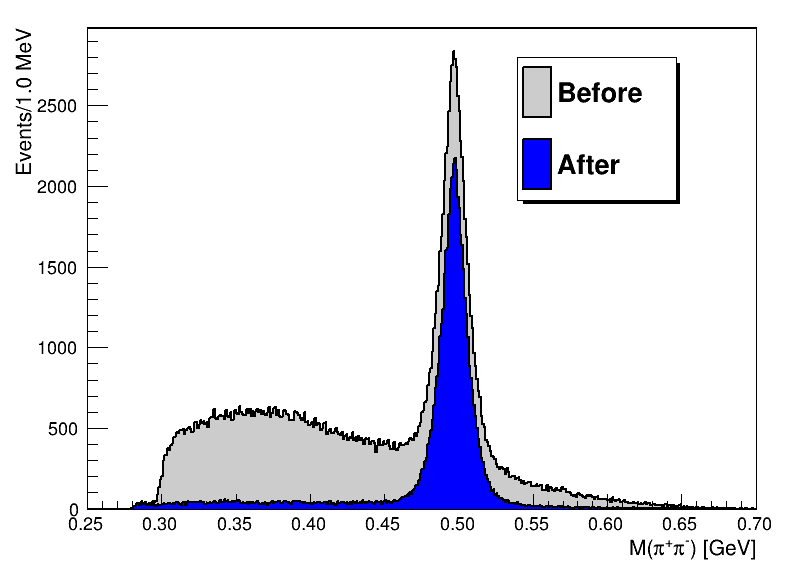

In [17]:
hist_ks_before.GetXaxis().SetTitle('M(#pi^{+}#pi^{-}) [GeV]')
hist_ks_before.GetYaxis().SetTitle(f'Events/{(0.75-0.25)/500*1000} MeV')
hist_ks_after.SetFillColor(ROOT.kBlue)
legend = ROOT.TLegend(0.65, 0.65, 0.85, 0.9)
legend.AddEntry(hist_ks_before.GetPtr(), 'Before', 'f')
legend.AddEntry(hist_ks_after.GetPtr(), 'After', 'f')
hist_ks_before.Draw()
hist_ks_after.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs('/work/halld/home/viducic/scripts/plotting/dnp_maui/plots/ks_before_after.png')


Info in <TCanvas::Print>: png file /work/halld/home/viducic/scripts/plotting/dnp_maui/plots/pl_vs_ks.png has been created


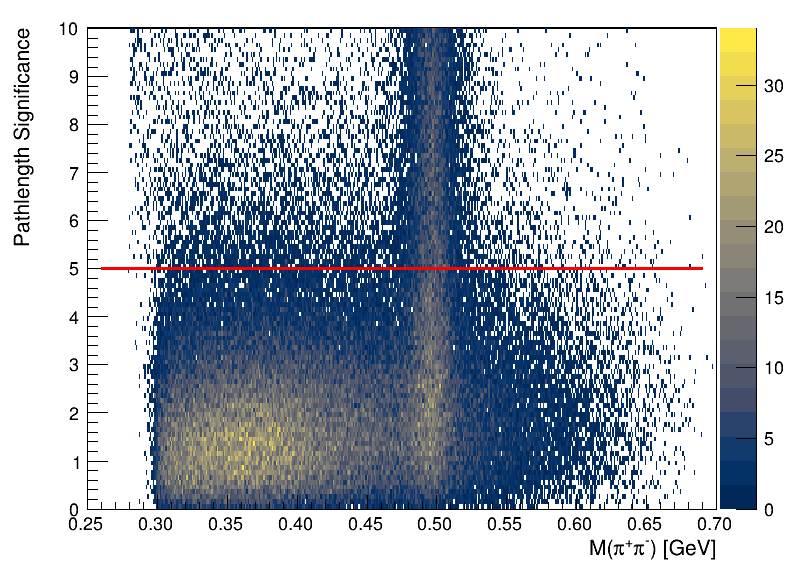

In [18]:
pl_cut_line = ROOT.TLine(0.26, 5, 0.69, 5)
pl_cut_line.SetLineColor(ROOT.kRed)
pl_cut_line.SetLineWidth(3)
hist_pl_vs_ks.GetXaxis().SetTitle('M(#pi^{+}#pi^{-}) [GeV]')
hist_pl_vs_ks.GetYaxis().SetTitle('Pathlength Significance')
hist_pl_vs_ks.GetZaxis().SetTitleOffset(1.3)
c.SetRightMargin(0.1)
hist_pl_vs_ks.Draw('colz')
pl_cut_line.Draw()
c.Draw()
c.SaveAs('/work/halld/home/viducic/scripts/plotting/dnp_maui/plots/pl_vs_ks.png')



Info in <TCanvas::Print>: png file /work/halld/home/viducic/scripts/plotting/dnp_maui/plots/ppip_ppim.png has been created


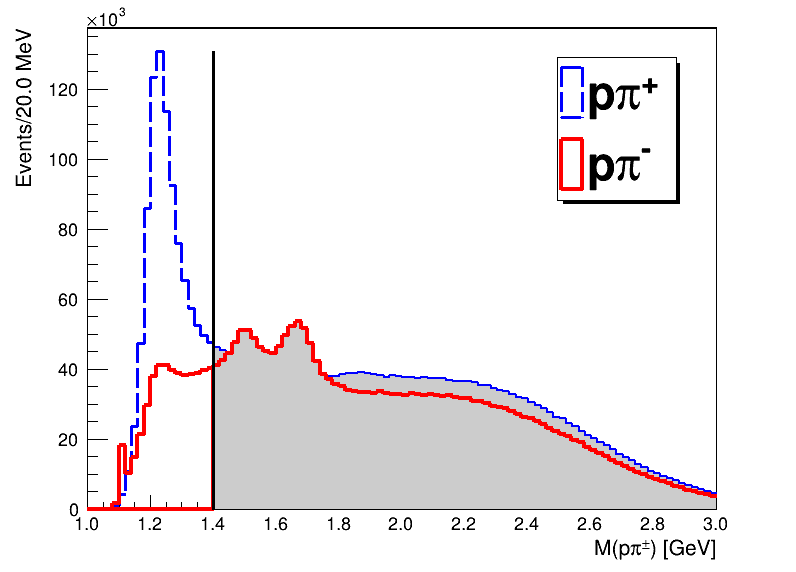

In [19]:
# hist_ppip.SetFillColorAlpha(ROOT.kBlue, 0.5)
# hist_ppim.SetFillColor(0)
# hist_ppim.SetLineColor(ROOT.kRed)
# hist_ppim.SetLineWidth(3)

# hist_ppip.SetFillColor(0)
hist_ppip.SetLineColor(ROOT.kBlue)
hist_ppip_cut.SetLineColor(ROOT.kBlue)
hist_ppim.SetLineColor(ROOT.kRed)
hist_ppim_cut.SetLineColor(ROOT.kRed)

hist_ppip.SetLineStyle(9)
hist_ppip_cut.SetLineStyle(9)

hist_ppip.SetLineWidth(3)
hist_ppip_cut.SetLineWidth(1)
hist_ppim.SetLineWidth(4)
hist_ppim_cut.SetLineWidth(4)

hist_ppip.SetFillColor(0)
hist_ppim.SetFillColor(0)
# hist_ppim.SetFillColorAlpha(ROOT.kRed, 0.5)

# hist_ppim.SetFillColor(ROOT.kRed)
# ROOT.gStyle.SetHatchesLineWidth(2)
# ROOT.gStyle.SetHatchesSpacing(0.35)
# # hist_ppim.SetFillStyle(3001)
# hist_ppim.SetFillStyle(3627)
hist_ppip.GetXaxis().SetTitle('M(p#pi^{#pm}) [GeV]')
hist_ppip.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')
hist_ppim.GetXaxis().SetTitle('M(p#pi^{#pm}) [GeV]')
hist_ppim.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')

legend = ROOT.TLegend(0.7, 0.65, 0.85, 0.9)
legend.AddEntry(hist_ppip.GetPtr(), 'p#pi^{+}', 'f')
# legend.AddEntry(hist_ppip.GetPtr(), 'p#pi^{+}', 'l')
legend.AddEntry(hist_ppim.GetPtr(), 'p#pi^{-}', 'f')
# legend.AddEntry(hist_ppim.GetPtr(), 'p#pi^{-}', 'l')


sorted_hists = tools.sort_hists_by_max([hist_ppip, hist_ppim, hist_ppip_cut, hist_ppim_cut])
ppi_cut_line = ROOT.TLine(1.4, 0, 1.4, sorted_hists[0].GetMaximum())
ppi_cut_line.SetLineColor(ROOT.kBlack)
ppi_cut_line.SetLineWidth(3)
# sorted_hists[0].Draw()
# sorted_hists[1].Draw('same')
# sorted_hists[2].Draw('same')
# sorted_hists[3].Draw('same')
hist_ppip.Draw()
hist_ppip_cut.Draw('same')
hist_ppim.Draw('same')
hist_ppim_cut.Draw('same')
legend.Draw()
ppi_cut_line.Draw()
c.Draw()
c.SaveAs('/work/halld/home/viducic/scripts/plotting/dnp_maui/plots/ppip_ppim.png')


Info in <TCanvas::Print>: png file /work/halld/home/viducic/scripts/plotting/dnp_maui/plots/ksp_kmp_kpp.png has been created


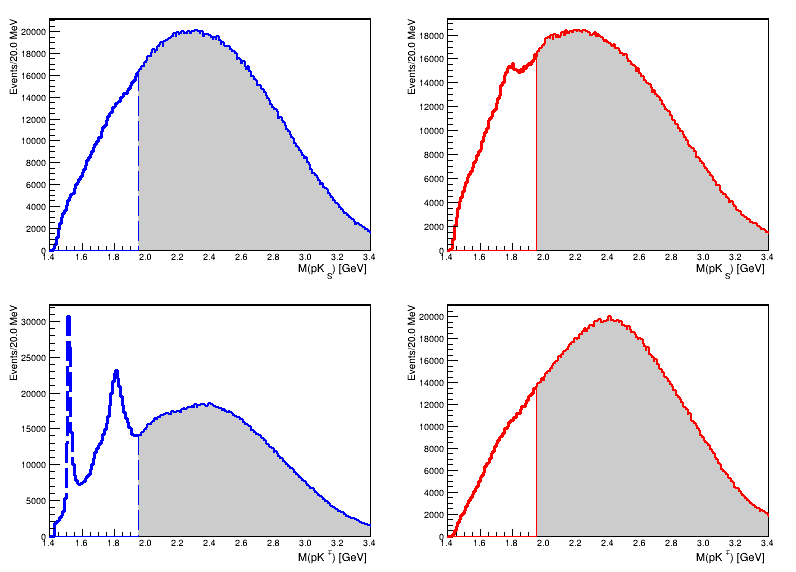

In [20]:
c.Clear()
c.Divide(2, 2)

hist_ksp_pipkmks.SetLineColor(ROOT.kBlue)
hist_ksp_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_kmp.SetLineColor(ROOT.kBlue)
hist_kmp_cut.SetLineColor(ROOT.kBlue)

hist_ksp_pimkpks.SetLineColor(ROOT.kRed)
hist_ksp_pimkpks_cut.SetLineColor(ROOT.kRed)
hist_kpp.SetLineColor(ROOT.kRed)
hist_kpp_cut.SetLineColor(ROOT.kRed)

hist_ksp_pipkmks.SetLineWidth(3)
hist_ksp_pipkmks_cut.SetLineWidth(1)
hist_kmp.SetLineWidth(3)
hist_kmp_cut.SetLineWidth(1)

hist_ksp_pimkpks.SetLineWidth(3)
hist_ksp_pimkpks_cut.SetLineWidth(1)
hist_kpp.SetLineWidth(3)
hist_kpp_cut.SetLineWidth(1)

hist_ksp_pipkmks.SetFillColor(0)
hist_ksp_pimkpks.SetFillColor(0)
hist_kmp.SetFillColor(0)
hist_kpp.SetFillColor(0)

hist_ksp_pipkmks.SetLineStyle(9)
hist_ksp_pipkmks_cut.SetLineStyle(9)
hist_kmp.SetLineStyle(9)
hist_kmp_cut.SetLineStyle(9)

hist_ksp_pipkmks.GetXaxis().SetTitle('M(pK_{S}) [GeV]')
hist_ksp_pipkmks.GetXaxis().SetTitleSize(0.045)
hist_ksp_pipkmks_cut.GetXaxis().SetTitle('M(pK_{S}) [GeV]')
hist_ksp_pipkmks_cut.GetXaxis().SetTitleSize(0.045)
hist_ksp_pipkmks.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')
hist_ksp_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_ksp_pipkmks_cut.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')
hist_ksp_pipkmks_cut.GetYaxis().SetTitleOffset(1.5)
hist_ksp_pimkpks.GetXaxis().SetTitle('M(pK_{S}) [GeV]')
hist_ksp_pimkpks.GetXaxis().SetTitleSize(0.045)
hist_ksp_pimkpks_cut.GetXaxis().SetTitle('M(pK_{S}) [GeV]')
hist_ksp_pimkpks_cut.GetXaxis().SetTitleSize(0.045)
hist_ksp_pimkpks.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')
hist_ksp_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_ksp_pimkpks_cut.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')
hist_ksp_pimkpks_cut.GetYaxis().SetTitleOffset(1.5)
hist_kmp.GetXaxis().SetTitle('M(pK^{#mp}) [GeV]')
hist_kmp.GetXaxis().SetTitleSize(0.045)
hist_kmp_cut.GetXaxis().SetTitle('M(pK^{#mp}) [GeV]')
hist_kmp_cut.GetXaxis().SetTitleSize(0.045)
hist_kmp.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')
hist_kmp.GetYaxis().SetTitleOffset(1.5)
hist_kmp_cut.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')
hist_kmp_cut.GetYaxis().SetTitleOffset(1.5)
hist_kpp.GetXaxis().SetTitle('M(pK^{#mp}) [GeV]')
hist_kpp.GetXaxis().SetTitleSize(0.045)
hist_kpp_cut.GetXaxis().SetTitle('M(pK^{#mp}) [GeV]')
hist_kpp_cut.GetXaxis().SetTitleSize(0.045)
hist_kpp.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')
hist_kpp.GetYaxis().SetTitleOffset(1.5)
hist_kpp_cut.GetYaxis().SetTitle(f'Events/{(3.0-1.0)/100*1000} MeV')
hist_kpp_cut.GetYaxis().SetTitleOffset(1.5)

c.cd(1)
hist_ksp_pipkmks.Draw()
hist_ksp_pipkmks_cut.Draw('same')
c.cd(2)
hist_ksp_pimkpks.Draw()
hist_ksp_pimkpks_cut.Draw('same')
c.cd(3)
hist_kmp.Draw()
hist_kmp_cut.Draw('same')
c.cd(4)
hist_kpp.Draw()
hist_kpp_cut.Draw('same')
c.Draw()
c.SaveAs('/work/halld/home/viducic/scripts/plotting/dnp_maui/plots/ksp_kmp_kpp.png')

Info in <TCanvas::Print>: png file /work/halld/home/viducic/scripts/plotting/dnp_maui/plots/kstar0_kstar_plus_minus.png has been created


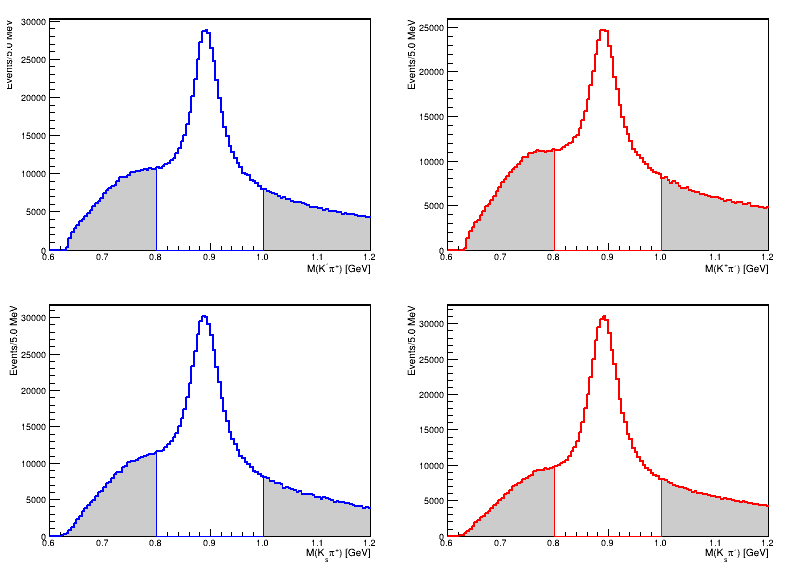

In [21]:
hist_kstar0_pipkmks.GetXaxis().SetTitle('M(K^{-}#pi^{+}) [GeV]')
hist_kstar0_pipkmks.GetXaxis().SetTitleSize(0.04)
hist_kstar0_pipkmks_cut.GetXaxis().SetTitle('M(K^{-}#pi^{+}) [GeV]')
hist_kstar0_pipkmks_cut.GetXaxis().SetTitleSize(0.04)
hist_kstar0_pipkmks.GetYaxis().SetTitle(f'Events/{(1.2-0.6)/120*1000} MeV')
hist_kstar0_pipkmks.GetYaxis().SetTitleOffset(1.7)
hist_kstar0_pipkmks_cut.GetYaxis().SetTitle(f'Events/{(1.2-0.6)/120*1000} MeV')
hist_kstar0_pimkpks_cut.GetYaxis().SetTitleOffset(1.5)

hist_kstar0_pimkpks.GetXaxis().SetTitle('M(K^{+}#pi^{-}) [GeV]')
hist_kstar0_pimkpks.GetXaxis().SetTitleSize(0.04)
hist_kstar0_pimkpks_cut.GetXaxis().SetTitle('M(K^{+}#pi^{-}) [GeV]')
hist_kstar0_pimkpks_cut.GetXaxis().SetTitleSize(0.04)
hist_kstar0_pimkpks.GetYaxis().SetTitle(f'Events/{(1.2-0.6)/120*1000} MeV')
hist_kstar0_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_kstar0_pimkpks_cut.GetYaxis().SetTitle(f'Events/{(1.2-0.6)/120*1000} MeV')
hist_kstar0_pimkpks_cut.GetYaxis().SetTitleOffset(1.5)

hist_kstar_plus.GetXaxis().SetTitle('M(K_{s}#pi^{+}) [GeV]')
hist_kstar_plus.GetXaxis().SetTitleSize(0.04)
hist_kstar_plus_cut.GetXaxis().SetTitle('M(K_{s}#pi^{+}) [GeV]')
hist_kstar_plus_cut.GetXaxis().SetTitleSize(0.04)
hist_kstar_plus.GetYaxis().SetTitle(f'Events/{(1.2-0.6)/120*1000} MeV')
hist_kstar_plus.GetYaxis().SetTitleOffset(1.5)
hist_kstar_plus_cut.GetYaxis().SetTitle(f'Events/{(1.2-0.6)/120*1000} MeV')
hist_kstar_plus_cut.GetYaxis().SetTitleOffset(1.5)

hist_kstar_minus.GetXaxis().SetTitle('M(K_{s}#pi^{-}) [GeV]')
hist_kstar_minus.GetXaxis().SetTitleSize(0.04)
hist_kstar_minus_cut.GetXaxis().SetTitle('M(K_{s}#pi^{-}) [GeV]')
hist_kstar_minus_cut.GetXaxis().SetTitleSize(0.04)
hist_kstar_minus.GetYaxis().SetTitle(f'Events/{(1.2-0.6)/120*1000} MeV')
hist_kstar_minus.GetYaxis().SetTitleOffset(1.5)
hist_kstar_minus_cut.GetYaxis().SetTitle(f'Events/{(1.2-0.6)/120*1000} MeV')
hist_kstar_minus_cut.GetYaxis().SetTitleOffset(1.7)


hist_kstar0_pipkmks.SetLineColor(ROOT.kBlue)
hist_kstar0_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_kstar_plus.SetLineColor(ROOT.kBlue)
hist_kstar_plus_cut.SetLineColor(ROOT.kBlue)

hist_kstar0_pimkpks.SetLineColor(ROOT.kRed)
hist_kstar0_pimkpks_cut.SetLineColor(ROOT.kRed)
hist_kstar_minus.SetLineColor(ROOT.kRed)
hist_kstar_minus_cut.SetLineColor(ROOT.kRed)

hist_kstar0_pipkmks_cut.SetLineWidth(3)
hist_kstar_plus_cut.SetLineWidth(3)
hist_kstar0_pimkpks_cut.SetLineWidth(3)
hist_kstar_minus_cut.SetLineWidth(3)

hist_kstar0_pipkmks_cut.SetLineWidth(1)
hist_kstar_plus_cut.SetLineWidth(1)
hist_kstar0_pimkpks_cut.SetLineWidth(1)
hist_kstar_minus_cut.SetLineWidth(1)

hist_kstar0_pipkmks.SetFillColor(0)
hist_kstar_plus.SetFillColor(0)
hist_kstar0_pimkpks.SetFillColor(0)
hist_kstar_minus.SetFillColor(0)

c.cd(1)
hist_kstar0_pipkmks.Draw()
hist_kstar0_pipkmks_cut.Draw('same')
c.cd(2)
hist_kstar0_pimkpks.Draw()
hist_kstar0_pimkpks_cut.Draw('same')
c.cd(3)
hist_kstar_plus.Draw()
hist_kstar_plus_cut.Draw('same')
c.cd(4)
hist_kstar_minus.Draw()
hist_kstar_minus_cut.Draw('same')
c.Draw()
c.SaveAs('/work/halld/home/viducic/scripts/plotting/dnp_maui/plots/kstar0_kstar_plus_minus.png')


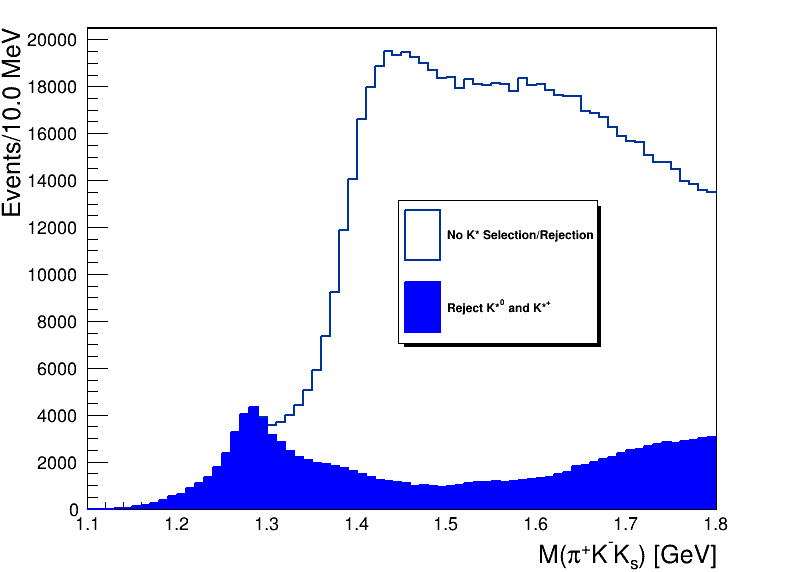

In [36]:
c.Clear()
# c.Divide(1,2)

hist_pipkmks.GetXaxis().SetTitle('M(#pi^{+}K^{-}K_{s}) [GeV]')
hist_pipkmks.GetXaxis().SetTitleSize(0.0475)
hist_pipkmks.GetYaxis().SetTitleSize(0.0475)
hist_pipkmks.GetYaxis().SetTitle(f'Events/{(1.8-1.1)/70*1000} MeV')
hist_pipkmks_1285.GetXaxis().SetTitle('M(#pi^{+}K^{-}K_{s}) [GeV]')
hist_pipkmks_1285.GetXaxis().SetTitleSize(0.0475)
hist_pipkmks_1285.GetYaxis().SetTitleSize(0.0475)
hist_pipkmks_1285.GetYaxis().SetTitle(f'Events/{(1.8-1.1)/70*1000} MeV')



legend_pipkmks = ROOT.TLegend(0.5, 0.4, 0.75, 0.65)
legend_pipkmks.AddEntry(hist_pipkmks.GetPtr(), 'No K* Selection/Rejection', 'f')
legend_pipkmks.AddEntry(hist_pipkmks_1285.GetPtr(), 'Reject K*^{0} and K*^{+}', 'f')




# hist_pipkmks.SetLineColor(ROOT.kBlue)
hist_pipkmks.SetLineColor(854)
hist_pipkmks_1285.SetLineColor(ROOT.kBlue)


# hist_pipkmks.SetFillColor()
hist_pipkmks_1285.SetFillColor(ROOT.kBlue)

# hist_pipkmks_1420_charged.SetFillColorAlpha(ROOT.kPink, 0.4)


# hist_pipkmks_1420_charged.SetFillColorAlpha(ROOT.kPink, 0.4)


hist_pipkmks.Draw()
hist_pipkmks_1285.Draw('same')

legend_pipkmks.Draw()

c.Draw()

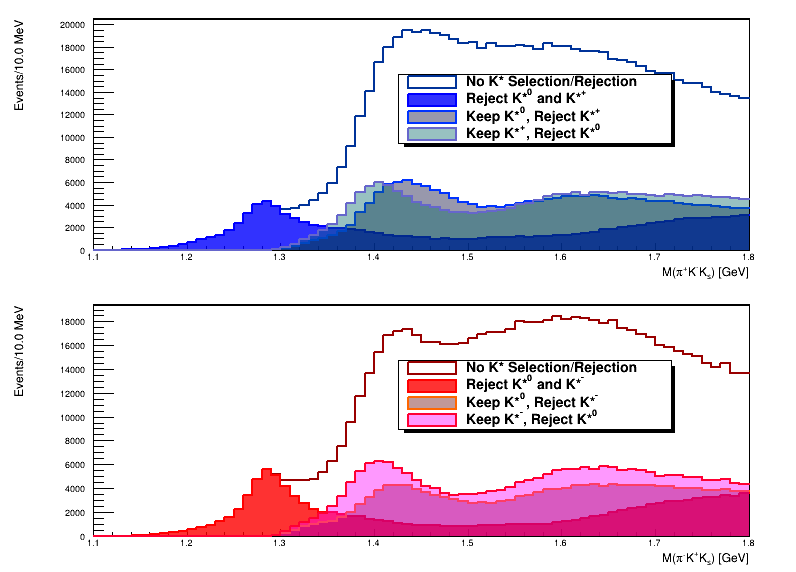

In [30]:
c.Clear()
c.Divide(1,2)

hist_pipkmks.GetXaxis().SetTitle('M(#pi^{+}K^{-}K_{s}) [GeV]')
hist_pipkmks.GetXaxis().SetTitleSize(0.0475)
hist_pipkmks.GetYaxis().SetTitleSize(0.0475)
hist_pipkmks.GetYaxis().SetTitle(f'Events/{(1.8-1.1)/70*1000} MeV')
hist_pipkmks_1285.GetXaxis().SetTitle('M(#pi^{+}K^{-}K_{s}) [GeV]')
hist_pipkmks_1285.GetXaxis().SetTitleSize(0.0475)
hist_pipkmks_1285.GetYaxis().SetTitleSize(0.0475)
hist_pipkmks_1285.GetYaxis().SetTitle(f'Events/{(1.8-1.1)/70*1000} MeV')
hist_pipkmks_1420_neutral.GetXaxis().SetTitle('M(#pi^{+}K^{-}K_{s}) [GeV]')
hist_pipkmks_1420_neutral.GetXaxis().SetTitleSize(0.0475)
hist_pipkmks_1420_neutral.GetYaxis().SetTitleSize(0.0475)
hist_pipkmks_1420_neutral.GetYaxis().SetTitle(f'Events/{(1.8-1.1)/70*1000} MeV')
hist_pipkmks_1420_charged.GetXaxis().SetTitle('M(#pi^{+}K^{-}K_{s}) [GeV]')
hist_pipkmks_1420_charged.GetXaxis().SetTitleSize(0.0475)
hist_pipkmks_1420_charged.GetYaxis().SetTitleSize(0.0475)
hist_pipkmks_1420_charged.GetYaxis().SetTitle(f'Events/{(1.8-1.1)/70*1000} MeV')

hist_pimkpks.GetXaxis().SetTitle('M(#pi^{-}K^{+}K_{s}) [GeV]')
hist_pimkpks.GetXaxis().SetTitleSize(0.0475)
hist_pimkpks.GetYaxis().SetTitleSize(0.0475)
hist_pimkpks.GetYaxis().SetTitle(f'Events/{(1.8-1.1)/70*1000} MeV')
hist_pimkpks_1285.GetXaxis().SetTitle('M(#pi^{-}K^{+}K_{s}) [GeV]')
hist_pimkpks_1285.GetXaxis().SetTitleSize(0.0475)
hist_pimkpks_1285.GetYaxis().SetTitleSize(0.0475)
hist_pimkpks_1285.GetYaxis().SetTitle(f'Events/{(1.8-1.1)/70*1000} MeV')
hist_pimkpks_1420_neutral.GetXaxis().SetTitle('M(#pi^{-}K^{+}K_{s}) [GeV]')
hist_pimkpks_1420_neutral.GetXaxis().SetTitleSize(0.0475)
hist_pimkpks_1420_neutral.GetYaxis().SetTitleSize(0.0475)
hist_pimkpks_1420_neutral.GetYaxis().SetTitle(f'Events/{(1.8-1.1)/70*1000} MeV')
hist_pimkpks_1420_charged.GetXaxis().SetTitle('M(#pi^{-}K^{+}K_{s}) [GeV]')
hist_pimkpks_1420_charged.GetXaxis().SetTitleSize(0.0475)
hist_pimkpks_1420_charged.GetYaxis().SetTitleSize(0.0475)

legend_pipkmks = ROOT.TLegend(0.5, 0.5, 0.85, 0.75)
legend_pipkmks.AddEntry(hist_pipkmks.GetPtr(), 'No K* Selection/Rejection', 'f')
legend_pipkmks.AddEntry(hist_pipkmks_1285.GetPtr(), 'Reject K*^{0} and K*^{+}', 'f')
legend_pipkmks.AddEntry(hist_pipkmks_1420_neutral.GetPtr(), 'Keep K*^{0}, Reject K*^{+}', 'f')
legend_pipkmks.AddEntry(hist_pipkmks_1420_charged.GetPtr(), 'Keep K*^{+}, Reject K*^{0}', 'f')

legend_pimkpks = ROOT.TLegend(0.5, 0.5, 0.85, 0.75)
legend_pimkpks.AddEntry(hist_pimkpks.GetPtr(), 'No K* Selection/Rejection', 'f')
legend_pimkpks.AddEntry(hist_pimkpks_1285.GetPtr(), 'Reject K*^{0} and K*^{-}', 'f')
legend_pimkpks.AddEntry(hist_pimkpks_1420_neutral.GetPtr(), 'Keep K*^{0}, Reject K*^{-}', 'f')
legend_pimkpks.AddEntry(hist_pimkpks_1420_charged.GetPtr(), 'Keep K*^{-}, Reject K*^{0}', 'f')


# hist_pipkmks.SetLineColor(ROOT.kBlue)
hist_pipkmks.SetLineColor(854)
hist_pipkmks_1285.SetLineColor(ROOT.kBlue)
hist_pipkmks_1420_neutral.SetLineColor(ROOT.kAzure)
hist_pipkmks_1420_charged.SetLineColor(594)

hist_pipkmks.SetFillColor(0)
hist_pipkmks_1285.SetFillColorAlpha(ROOT.kBlue, 0.8)
hist_pipkmks_1420_neutral.SetFillColorAlpha(604, 0.4)
hist_pipkmks_1420_charged.SetFillColorAlpha(435, 0.4)
# hist_pipkmks_1420_charged.SetFillColorAlpha(ROOT.kPink, 0.4)

# hist_pimkpks.SetLineColor(ROOT.kRed)
hist_pimkpks.SetLineColor(634)
hist_pimkpks_1285.SetLineColor(ROOT.kRed)
hist_pimkpks_1420_neutral.SetLineColor(807)
hist_pimkpks_1420_charged.SetLineColor(ROOT.kPink)

hist_pimkpks.SetFillColor(0)
hist_pimkpks_1285.SetFillColorAlpha(ROOT.kRed, 0.8)
hist_pimkpks_1420_neutral.SetFillColorAlpha(635, 0.4)
hist_pimkpks_1420_charged.SetFillColorAlpha(ROOT.kMagenta, 0.4)
# hist_pipkmks_1420_charged.SetFillColorAlpha(ROOT.kPink, 0.4)

c.cd(1)
hist_pipkmks.Draw()
hist_pipkmks_1285.Draw('same')
hist_pipkmks_1420_neutral.Draw('same')
hist_pipkmks_1420_charged.Draw('same')
legend_pipkmks.Draw()

c.cd(2)
hist_pimkpks.Draw()
hist_pimkpks_1285.Draw('same')
hist_pimkpks_1420_neutral.Draw('same')
hist_pimkpks_1420_charged.Draw('same')
legend_pimkpks.Draw()

c.Draw()

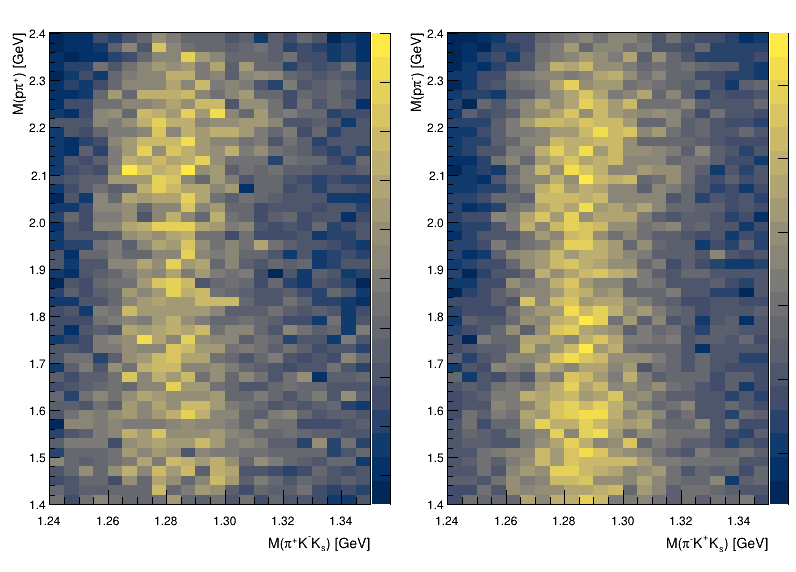

In [31]:
hist_ppi_kkpi_pipkmks.GetXaxis().SetTitle('M(#pi^{+}K^{-}K_{s}) [GeV]')
hist_ppi_kkpi_pipkmks.GetYaxis().SetTitle('M(p#pi^{+}) [GeV]')

hist_ppi_kkp_pimkpks.GetXaxis().SetTitle('M(#pi^{-}K^{+}K_{s}) [GeV]')
hist_ppi_kkp_pimkpks.GetYaxis().SetTitle('M(p#pi^{-}) [GeV]')

c.Clear()
c.Divide(2, 1)
c.cd(1)
hist_ppi_kkpi_pipkmks.Draw('colz')
c.cd(2)
hist_ppi_kkp_pimkpks.Draw('colz')
c.Draw()

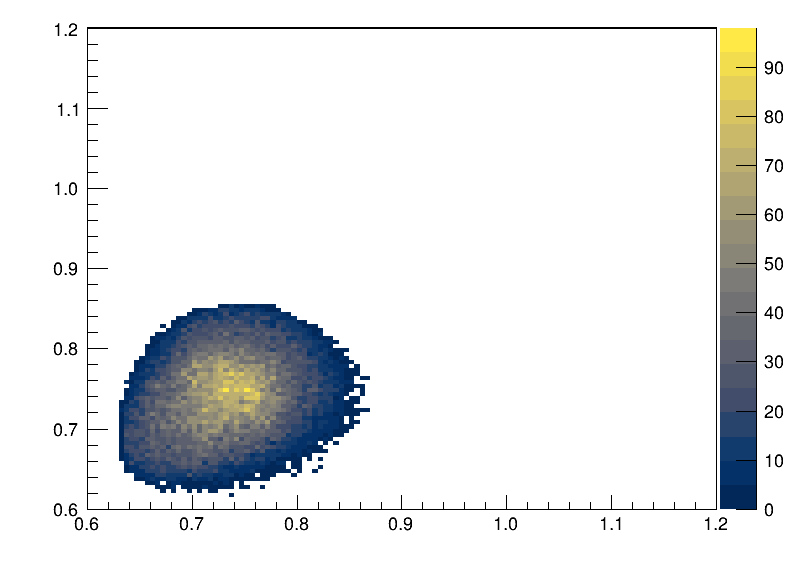

In [32]:
kspip_cut_low = ROOT.TLine(0.6, 0.8, 1.2, 0.8)
kspip_cut_high = ROOT.TLine(0.6, 1.0, 1.2, 1.0)
kmpip_cut_low = ROOT.TLine(0.8, 0.6, 0.8, 1.2)
kmpip_cut_high = ROOT.TLine(1.0, 0.6, 1.0, 1.2)

kspip_cut_low.SetLineColor(ROOT.kRed)
kspip_cut_low.SetLineWidth(2)
kspip_cut_high.SetLineColor(ROOT.kRed)
kspip_cut_high.SetLineWidth(2)
kmpip_cut_low.SetLineColor(ROOT.kRed)
kmpip_cut_low.SetLineWidth(2)
kmpip_cut_high.SetLineColor(ROOT.kRed)
kmpip_cut_high.SetLineWidth(2)


c.Clear()
hist_kspip_vs_kmpip_1285.GetXaxis().SetTitle('')
hist_kspip_vs_kmpip_1285.GetYaxis().SetTitle('')
hist_kspip_vs_kmpip_1285.Draw('colz')
# kspip_cut_low.Draw()
# kspip_cut_high.Draw()
# kmpip_cut_low.Draw()
# kmpip_cut_high.Draw()
c.Draw()

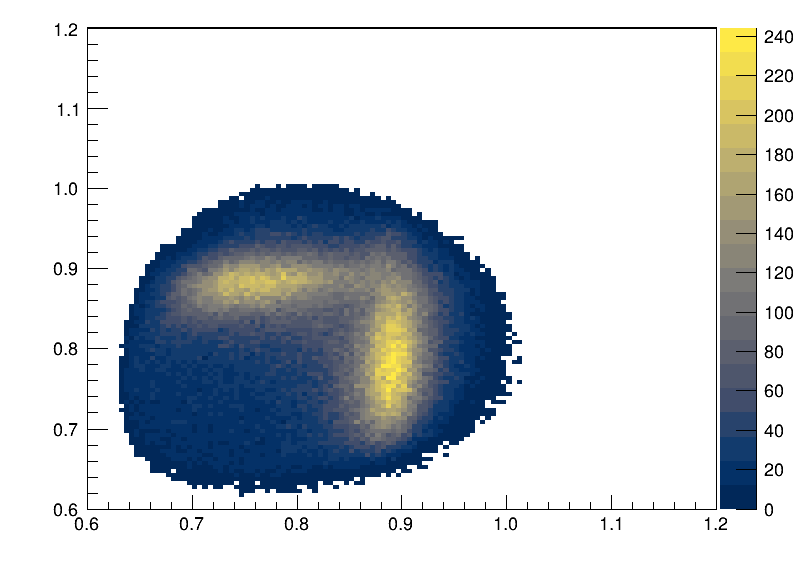

In [33]:
c.Clear()
hist_kspip_vs_kmpip_1350.GetXaxis().SetTitle('')
hist_kspip_vs_kmpip_1350.GetYaxis().SetTitle('')
hist_kspip_vs_kmpip_1350.Draw('colz')

c.Draw()

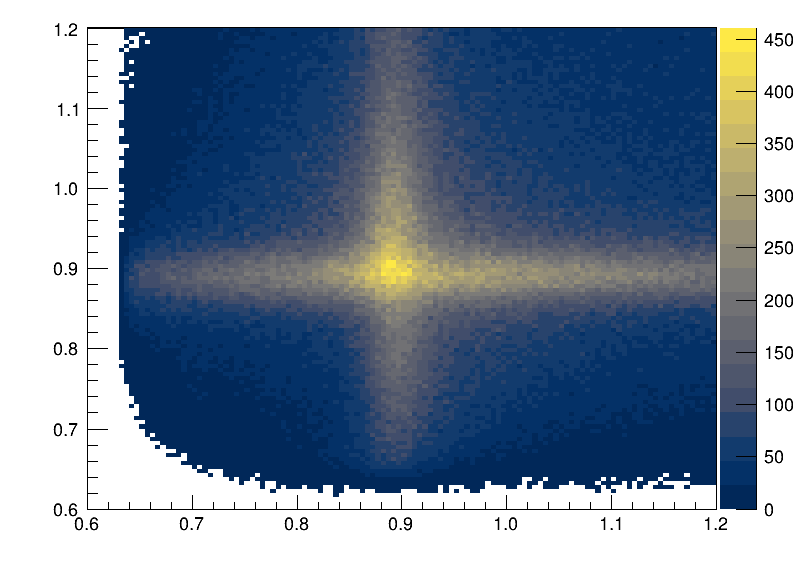

In [34]:
c.Clear()
hist_kspip_vs_kmpip_1500.GetXaxis().SetTitle('')
hist_kspip_vs_kmpip_1500.GetYaxis().SetTitle('')
hist_kspip_vs_kmpip_1500.Draw('colz')

# kspip_cut_low.Draw()
# kspip_cut_high.Draw()
# kmpip_cut_low.Draw()
# kmpip_cut_high.Draw()
c.Draw()